# Module 3

This module would introduce us to the Regression related inferences to be drawn from the data.

Regression is basically a statistical approach to find the relationship between variables. In machine learning, this is used to predict the outcome of an event based on the relationship between variables obtained from the data-set. More often than not, we utilize linear regression to come up with an ideal inference

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

## Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("Datasets/GOLD.csv")

In [3]:
df.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [4]:
X = df[['Price','Open','High','Low']].head(411)
Y = df['Pred'].head(411)

In [5]:
lin = LinearRegression() 
fit_r = lin.fit(X,Y) 

In [6]:
fit_r.coef_

array([ 2.,  3., -1., -4.])

In [7]:
X_find = df[['Price','Open','High','Low']].tail(101)

In [8]:
Y_pred = lin.predict(X_find)

In [9]:
df['Pred'][411:] = Y_pred

In [10]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

Best degree 1 with RMSE 8.251630283518526e-12


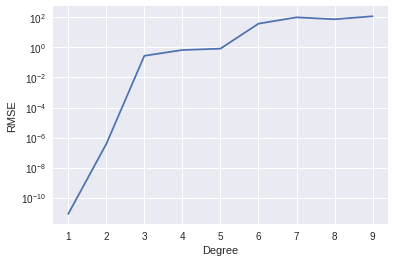

In [11]:
#In this section, We are gonna find out the best degree for the Polynomial Regression Model.
X = df[['Price','Open','High','Low']]
y = df['Pred']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
        # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.show()

In [12]:
poly = PolynomialFeatures(degree = 1)#Used Best Degree According to Graph
X_poly = poly.fit_transform(df[['Price','Open','High','Low']])
y = df['new']
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)
lin2 = LinearRegression()
poly.fit(X_train, y_train) 
lin2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lin2.coef_

array([ 0.        ,  1.01319701, -1.00038716,  1.00529137, -1.01816907])

In [14]:
poly.fit(X_test) 
y_pred_1 = lin2.predict(X_test)

In [15]:
r2_score(y_test, y_pred_1)

0.9999916114573492

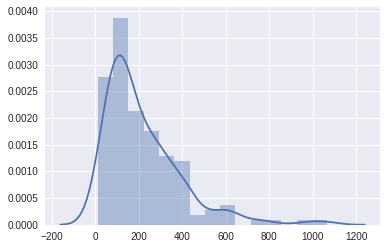

In [16]:
sns.distplot(y_pred_1)

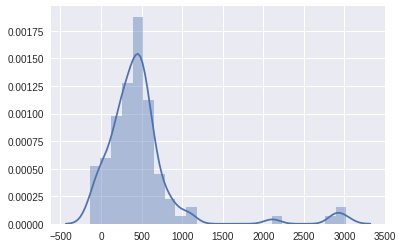

In [17]:
sns.distplot(Y_pred)

CAPM CAPM Analysis and Beta Calculation using regression -
CAPM(Capital Asset Pricing Model) attempts to price securities by examining the relationship that exists between expected returns and risk.

The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index). What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow?


## Query 3.2 
Import the stock of your choosing AND the Nifty index.
Using linear regression (OLS), calculate -
>The daily Beta value for the past 3 months. (Daily= Daily returns)

>The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula.<BR>
Attempt the question using regression.(Regression Reference)<BR>
Were the Beta values more or less than 1 ? What if it was negative ?<BR>
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results 

In [18]:
#My all previous work is based on GMR. So, I have choosen GMR for this too.
df2 = pd.read_csv("Datasets/MID_CAP/GMRINFRA.csv",parse_dates=True,index_col='Date')
df3 = pd.read_csv("Datasets/Nifty50.csv",parse_dates=True,index_col='Date')
daily_prices = pd.concat([df2['Close Price'], df3['Close']], axis=1)
daily_prices.columns = ['GMR', 'Nifty']

In [19]:
print(daily_prices.head())

# calculate daily returns
daily_returns = daily_prices.pct_change(1)
clean_daily_returns = daily_returns.dropna(axis=0)  # drop first missing row
print(clean_daily_returns.head())

              GMR    Nifty
Date                      
2017-05-15  17.55  9445.40
2017-05-16  17.40  9512.25
2017-05-17  17.30  9525.75
2017-05-18  16.75  9429.45
2017-05-19  16.95  9427.90
                 GMR     Nifty
Date                          
2017-05-16 -0.008547  0.007078
2017-05-17 -0.005747  0.001419
2017-05-18 -0.031792 -0.010109
2017-05-19  0.011940 -0.000164
2017-05-22 -0.008850  0.001098


In [20]:
# split dependent and independent variable

X = clean_daily_returns['Nifty']
y = clean_daily_returns['GMR']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMR   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     127.9
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           1.61e-26
Time:                        15:06:31   Log-Likelihood:                 1083.7
No. Observations:                 493   AIC:                            -2163.
Df Residuals:                     491   BIC:                            -2155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.425      0.6

In [21]:
print("Beta for all days in dataset: {}" .format(results.params[1]))

Beta for all days in dataset: 1.904384093358036


In [22]:
#Beta calculation for 3 months - 63 Days(as per Financial Markets)
X = clean_daily_returns['Nifty'].tail(63)
y = clean_daily_returns['GMR'].tail(63)
X1 = sm.add_constant(X) 
model = sm.OLS(y, X1)
results = model.fit()
print("Beta for 3 months as per daily returns: {}" .format(results.params[1]))

Beta for 3 months as per daily returns: 1.635273088999384


In [23]:
#Monthly Beta Calculation 
monthly_returns = daily_returns.copy()
monthly_returns = monthly_returns+1
monthly_returns = monthly_returns.dropna(axis=0)
monthly_returns['Year'] = pd.DatetimeIndex(monthly_returns.index).year
monthly_returns['Month'] = pd.DatetimeIndex(monthly_returns.index).month
monthly_returns = monthly_returns.groupby(['Month','Year']).prod()
monthly_returns = monthly_returns - 1

In [24]:
X = monthly_returns['Nifty']
Y = monthly_returns['GMR']
X1 = sm.add_constant(X)
model = sm.OLS(Y, X1)
results = model.fit()
print("Monthly Beta value for GMRINFRA: {}" .format(results.params[1]))

Monthly Beta value for GMRINFRA: 1.9971306457455724


### Discussion:

> Beta values are greater than 1 for GMRINFRA for every parameter. 

> Beta Values greater than 1 implies that Stock is Volatile. At various points, I have found out that GMRINFRA is a volatile stock. Performance of GMRINFRA is not appropriate for the investment.

> Stock market can't be risk free. Lower Beta Values implies of lower risk rate. Lower Beta also means lower volatility rate. 

> Thinking of market with Zero Risk & Zero Volatility, that will call for Zero beta value. What you see is not necessarily true. This proverb is for this situation,  your zero-beta investment actually loses if it pays interest at less than the rate of inflation.

> Negative Beta implicates investtment is  moving in opposite direction from stock market. When the market rises, a negative-beta investment generally falls. When the market falls, the negative-beta investment will tend to rise. A negative beta coefficient does not really mean non attendance of hazard. Rather, negative beta methods your speculation offers a support against genuine market downturns. In the event that the market keeps rising, nonetheless, a negative-beta speculation is losing cash through circumstance hazard – the loss of the opportunity to make higher returns – and expansion chance, in which a low rate of return does not keep pace with swelling.

> Regression Results - A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.